### Collecte et Préparation des Données
Tout d'abord, la collecte de données valables et utilisables est essentielle. Dans le domaine de l'ECG, nous faisons face à des contraintes élevées quant au matériel. Des appareils de mesure récents et modernes voient le jour : montres connectées, systèmes d'alertes d'arrêt cardiaque, puces intégrées, et bien plus encore dans les années à venir. Dans un premier temps, il nous fallait donc une masse de données utilisables.

### Données ECG
Nous avons recherché des ensembles de données ECG annotées avec des diagnostics. Nous utiliserons des bases de données publiques comme le MIT-BIH Arrhythmia Database ou le PTB Diagnostic ECG Database. Le jeu de données "Heartbeat" utilisé dans ce projet provient du Massachusetts Institute of Technology - Beth Israel Hospital (MIT-BIH). Ce jeu de données est une ressource couramment utilisée pour l'analyse des électrocardiogrammes (ECG) et la détection des arythmies cardiaques.

- **Origine** : MIT-BIH Arrhythmia Database. Cette base de données a été créée par le MIT en collaboration avec le Beth Israel Hospital à Boston. Elle a été introduite en 1980 et a été largement utilisée pour la recherche et le développement d'algorithmes de détection d'arythmie.
- **Objectif** : Fournir un ensemble de données standardisé pour l'évaluation des algorithmes de détection d'arythmie, faciliter la comparaison entre différentes approches et promouvoir la recherche dans le domaine de la cardiologie numérique.

### Format des Données
Le format des données est un point important dans la manipulation de celles-ci. Dans notre cas, nous privilégierons des formats publics tels que CSV et WFDB, puis dans un second temps, si cela est possible, des formats propriétaires traductibles.

Le jeu de données "Heartbeat" que nous utilisons est un dérivé de la base de données MIT-BIH et se compose de deux fichiers principaux :
- **mitbih_train.csv** : Fichier contenant les données d'entraînement.
- **mitbih_test.csv** : Fichier contenant les données de test.

Chaque fichier CSV a la même structure, mais avec des ensembles de données différents pour l'entraînement et le test.
- **Lignes** : Chaque ligne représente un battement cardiaque unique.
- **Colonnes** : Chaque colonne représente un point de données du signal ECG. Le nombre de colonnes peut varier, mais typiquement, il y a 187 colonnes représentant des points de données du signal ECG, et une dernière colonne représentant l'étiquette de la classe.

### Exemple de Structure des Données

| ECG Point 1 | ECG Point 2 | ... | ECG Point 187 | Label |
|-------------|-------------|-----|---------------|-------|
| 0.1         | 0.2         | ... | 0.5           | 0     |
| -0.1        | -0.2        | ... | -0.5          | 1     |
| ...         | ...         | ... | ...           | ...   |
| 0.3         | 0.4         | ... | 0.6           | 0     |

- **ECG Points (0 à 186)** : Ce sont les valeurs du signal ECG, prétraitées et normalisées.
- **Label (187)** : L'étiquette de la classe correspondant au type de battement cardiaque. Voici les classes possibles :
  - **0** : Battement normal
  - **1** : Battement prématuré auriculaire
  - **2** : Battement prématuré ventriculaire
  - **3** : Battement prématuré fusionné
  - **4** : Battement non classé

### Différence entre les Fichiers d'Entraînement et de Test
- **mitbih_train.csv** : Contient les données utilisées pour entraîner le modèle. Il représente une grande partie du jeu de données et couvre une variété de battements cardiaques pour permettre au modèle d'apprendre les caractéristiques distinctives de chaque classe.
- **mitbih_test.csv** : Contient les données utilisées pour tester le modèle après son entraînement. Il est essentiel de tester le modèle sur des données qu'il n'a pas vues pendant l'entraînement pour évaluer sa capacité de généralisation.

### Chargement des données 
Pour le chargement des donnés nous utiliserons une bibliothèque nommée Pandas. 
Elle offre des structures de données comme les DataFrames, qui sont des tableaux en deux dimensions, facilitant ainsi le nettoyage, la transformation et l'analyse des données.  Nous l'utiliserons également pour charger des données de différentes sources (CSV, Excel, SQL) et les préparer pour une analyse.

### Normalisation des Données 
La normalisation des données est une étape importante en prétraitement des données avant de les utiliser pour l'entraînement d'un modèle de machine learning. Elle permet de centrer et de mettre à l'échelle les caractéristiques pour qu'elles aient une moyenne nulle et un écart type unitaire. Cela peut améliorer la performance et la vitesse de convergence du modèle.

La normalisation  à plusieurs avantages :   
- **Échelle Uniforme** : Toutes les caractéristiques ont la même échelle, ce qui est crucial pour les algorithmes qui utilisent des distances ou des poids.
- **Performance Améliorée** : Les algorithmes de machine learning convergent plus rapidement et de manière plus stable.
- **Comparabilité** : Les valeurs des différentes caractéristiques deviennent comparables, facilitant l'interprétation et l'analyse.  

Pour la normalisation des données, nous utiliserons la bibliothèque scikit-learn (sklearn). Elle propose plusieurs techniques de prétraitement des données
Sklearn offre différentes méthodes de normalisation, comme StandardScaler pour la standardisation, MinMaxScaler pour la mise à l'échelle dans un intervalle spécifique, ou RobustScaler pour une normalisation robuste aux valeurs aberrantes.

#### Prétraitement des Données :
Le Prétraitement des données est très important pour obtenir un résultat critique qui à du sens et non des données complètement divergente d'une analyse que ferait un médecin. Le but étant d'aiguiller les doctorant dans leurs diagnostics.

Filtrage des Signaux : 
* Appliquez des filtres pour éliminer le bruit et les artefacts des signaux ECG.

Segmentation : 
* Divisez les signaux en segments correspondant aux cycles cardiaques (PQRST).
   
Extraction des Caractéristiques :    
* Caractéristiques Temporelles : Durée des intervalles P, QRS, T, etc.
* Caractéristiques Fréquentielles : Analyse de Fourier pour extraire des caractéristiques fréquentielles.
* Autres Caractéristiques : Hauteur des pics, dérivées, etc.


##### Modélisation :
Choix du Modèle : 

| Algorithme                          | Avantages                                                                 | Inconvénients                                                                    | Performance Générale (notation sur 5) |
|-------------------------------------|---------------------------------------------------------------------------|----------------------------------------------------------------------------------|----------------------------------------|
| Réseaux de Neurones Convolutifs (CNN) | - Excellente capacité à extraire des caractéristiques locales <br> - Performances élevées pour la classification des signaux <br> - Bien adapté pour les données ECG | - Besoin de grandes quantités de données pour un entraînement efficace <br> - Forte demande en puissance de calcul | ⭐⭐⭐⭐⭐ |
| Réseaux de Neurones Récurrents (RNN) | - Efficace pour les données séquentielles <br> - Capable de capturer des dépendances temporelles à long terme | - Difficulté de formation (problème de gradient)                                | ⭐⭐⭐⭐  |
| Long Short-Term Memory (LSTM)        | - Résolution des problèmes de dépendance à long terme <br> - Bonne performance sur des séries temporelles       | - Complexité et temps d'entraînement élevés <br> - Besoin de beaucoup de ressources | ⭐⭐⭐⭐  |
| Machines à Vecteurs de Support (SVM) | - Efficace pour les problèmes de classification binaire <br> - Fonctionne bien avec des petits jeux de données    | - Difficulté à s'adapter à des problèmes multi-classes <br> - Moins efficace sur de grandes bases de données | ⭐⭐⭐   |
| K-Nearest Neighbors (KNN)            | - Simplicité de mise en œuvre <br> - Bon pour les petits jeux de données                                         | - Performances réduites sur de grands jeux de données <br> - Sensible au bruit dans les données | ⭐⭐    |
| Forêts Aléatoires (Random Forest)    | - Bonne capacité de généralisation <br> - Moins sujet au surapprentissage                                         | - Peut être lent sur de grands jeux de données <br> - Difficile à interpréter    | ⭐⭐⭐   |
| Gradient Boosting Machines (GBM)     | - Hautes performances pour la prédiction <br> - Flexibilité dans la gestion des types de données                  | - Sensible au surapprentissage si mal paramétré <br> - Temps de calcul important | ⭐⭐⭐⭐  |
| Apprentissage en Profondeur (Deep Learning) | - Capable de traiter des volumes de données massifs <br> - Excellentes performances dans la détection des anomalies | - Forte demande en puissance de calcul et données <br> - Complexité de mise en œuvre | ⭐⭐⭐⭐⭐ |

### Aperçus du Tableau des Algorithmes d'IA pour la Prédiction d'ECG

Le tableau présente une analyse comparative de divers algorithmes d'IA utilisés pour la prédiction d'ECG, en soulignant leurs avantages, inconvénients et évaluations de performance globale. Les algorithmes listés ont été largement recherchés et mis en œuvre dans divers projets pour améliorer la précision et l'efficacité de l'analyse ECG et la détection des arythmies. 

Les réseaux de neurones convolutifs (CNN) sont particulièrement remarqués pour leur capacité à extraire des caractéristiques locales des signaux ECG, ce qui les rend très efficaces pour les tâches de classification des signaux, bien qu'ils nécessitent des ressources informatiques substantielles et de grands ensembles de données pour l'entraînement. 

Les réseaux de neurones récurrents (RNN), y compris les réseaux à mémoire à long court terme (LSTM), sont appréciés pour leur capacité à capturer les dépendances temporelles dans les données séquentielles, ce qui est crucial pour une analyse ECG précise. Cependant, ils rencontrent souvent des difficultés d'entraînement en raison de problèmes de gradient.

Les machines à vecteurs de support (SVM) ont été utilisées efficacement pour des tâches de classification binaire dans des ensembles de données plus petits, offrant une mise en œuvre plus simple par rapport aux réseaux neuronaux, mais elles ont du mal avec les problèmes multi-classes et les grands ensembles de données. 

Le K-Nearest Neighbors (KNN) est apprécié pour sa simplicité et son efficacité dans les petits ensembles de données, bien que ses performances diminuent avec les ensembles de données plus grands et les données bruyantes. 

Les forêts aléatoires et les machines de gradient boosting (GBM) offrent des performances robustes et une flexibilité dans la gestion de divers types de données, bien qu'elles puissent être intensives en calcul et parfois difficiles à interpréter.

### Préparation des Modèles d'Apprentissage Automatique
Dans le cadre de notre projet, nous avons exploré plusieurs modèles de machine learning pour identifier les arythmies cardiaques à partir de signaux ECG. Les algorithmes choisis incluent des méthodes classiques comme les **SVM (Support Vector Machines)**, **KNN (K-nearest Neighbors)**, et des approches plus avancées comme les **réseaux neuronaux récurrents (RNN)**, les **réseaux de neurones convolutifs (CNN)**, ainsi que les modèles **LSTM (Long Short-Term Memory)**, adaptés pour l'analyse des séries temporelles.

### Algorithmes de Machine Learning Utilisés
- **SVM (Support Vector Machines)** : Nous avons utilisé un SVM avec un noyau radial pour distinguer les battements cardiaques en fonction des caractéristiques du signal ECG.

- **KNN (K-nearest Neighbors)** : Le modèle KNN nous a permis de classifier les battements cardiaques en fonction des points de données les plus proches dans l'espace de caractéristiques. Nous avons ajusté le paramètre du nombre de voisins pour optimiser la performance.

- **Random Forest et Gradient Boosting Machine (GBM)** : Ces modèles d'ensemble ont été appliqués pour exploiter les capacités de classification multi-arborescente. Le Random Forest utilise une approche de vote majoritaire sur plusieurs arbres décisionnels, tandis que le GBM améliore la performance par itérations successives.

- **RNN et LSTM** : Pour capturer les dépendances temporelles présentes dans les signaux ECG, nous avons mis en œuvre des RNN et LSTM, qui sont particulièrement efficaces pour les données séquentielles comme celles que nous analysons. Ces modèles ont permis de prédire les étiquettes de battements cardiaques en tenant compte des informations temporelles à travers plusieurs étapes de signal.

- **CNN** : Les CNN sont bien connus pour leur capacité à détecter les motifs dans les données. Nous avons utilisé des couches de convolution pour extraire les caractéristiques importantes des signaux ECG, suivies de couches denses pour effectuer la classification finale.

### Paramètres d'Entraînement
Chaque modèle a été entraîné avec des paramètres adaptés à sa structure spécifique. Par exemple :

- Pour les réseaux **RNN** et **LSTM**, nous avons défini des paramètres tels que le nombre d'unités de neurones par couche, le nombre d'époques, et la taille des lots.
- Pour les modèles **SVM** et **KNN**, nous avons ajusté respectivement le noyau du SVM et le nombre de voisins pour optimiser la classification.
- Les modèles de réseaux neuronaux (**RNN**, **LSTM**, **CNN**) ont nécessité un formatage des données d'entrée en ajoutant une dimension temporelle afin de les rendre compatibles avec l’architecture attendue.

### Entraînement et Évaluation des Modèles
Nous avons divisé notre jeu de données en ensembles d’entraînement et de test, afin de pouvoir évaluer la capacité des modèles à généraliser à de nouvelles données. Nous avons utilisé la **validation croisée** pour affiner les hyperparamètres et évaluer de manière plus robuste la performance des modèles.

Après l'entraînement, nous avons utilisé des métriques telles que l'**accuracy** et le **rapport de classification** pour évaluer la performance de chaque modèle. Ces métriques nous ont permis de mesurer la précision avec laquelle chaque modèle pouvait prédire les classes de battements cardiaques sur l’ensemble de test.


Évaluation et Validation :
Taux de Correspondance : Utiliser des métriques comme l'accuracy, le F1-score, la précision et le rappel pour évaluer les performances du modèle.
Validation Croisée : Utilisez des techniques de validation croisée pour assurer la robustesse du modèle.
Déploiement et Interface Utilisateur :

In [5]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('results/results.csv')

# Afficher les premières lignes du DataFrame pour vérifier
df.head()

,Model,Parameters,File Type,Balancing Method,Augmentation Factor,Accuracy,Precision,Recall,F1 Score,CPU Usage (%),...,F1_Class_14,Precision_Class_15,Recall_Class_15,F1_Class_15,Precision_Class_macro avg,Recall_Class_macro avg,F1_Class_macro avg,Precision_Class_weighted avg,Recall_Class_weighted avg,F1_Class_weighted avg
0,cnn,"{'cnn_filters': 64, 'dense_units': 128, 'epoch...",frag,smote,4,0.985240,0.985401,0.985240,0.985229,0.5,...,1.000000,0.976190,0.931818,0.953488,0.990733,0.989287,0.989893,0.985401,0.985240,0.985229
1,rnn,"{'rnn_units': 64, 'epochs': 10, 'batch_size': 32}",frag,none,3,0.280328,0.176726,0.280328,0.195623,1.0,...,0.000000,0.000000,0.000000,0.000000,0.091340,0.106646,0.089142,0.176726,0.280328,0.195623
2,rf,{'n_estimators': 100},frag,smote,2,0.941032,0.944519,0.941032,0.938145,1.0,...,0.666667,0.931034,1.000000,0.964286,0.971156,0.869048,0.904314,0.944519,0.941032,0.938145
3,rf,{'n_estimators': 200},frag,smote,2,0.901720,0.904455,0.901720,0.898522,0.9,...,1.000000,0.840000,0.777778,0.807692,0.930106,0.889653,0.896208,0.904455,0.901720,0.898522
4,rf,{'n_estimators': 50},frag,smote,2,0.931204,0.936254,0.931204,0.930094,1.0,...,1.000000,1.000000,0.931034,0.964286,0.967178,0.926864,0.943559,0.936254,0.931204,0.930094


In [6]:
# Afficher un sous-ensemble des colonnes importantes pour la comparaison
columns_to_display = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'CPU Usage (%)', 'RAM Usage (%)']
df[columns_to_display].head()  # Afficher les premières lignes

,Model,Accuracy,Precision,Recall,F1 Score,CPU Usage (%),RAM Usage (%)
0,cnn,0.985240,0.985401,0.985240,0.985229,0.5,40.2
1,rnn,0.280328,0.176726,0.280328,0.195623,1.0,40.3
2,rf,0.941032,0.944519,0.941032,0.938145,1.0,40.0
3,rf,0.901720,0.904455,0.901720,0.898522,0.9,40.0
4,rf,0.931204,0.936254,0.931204,0.930094,1.0,40.4


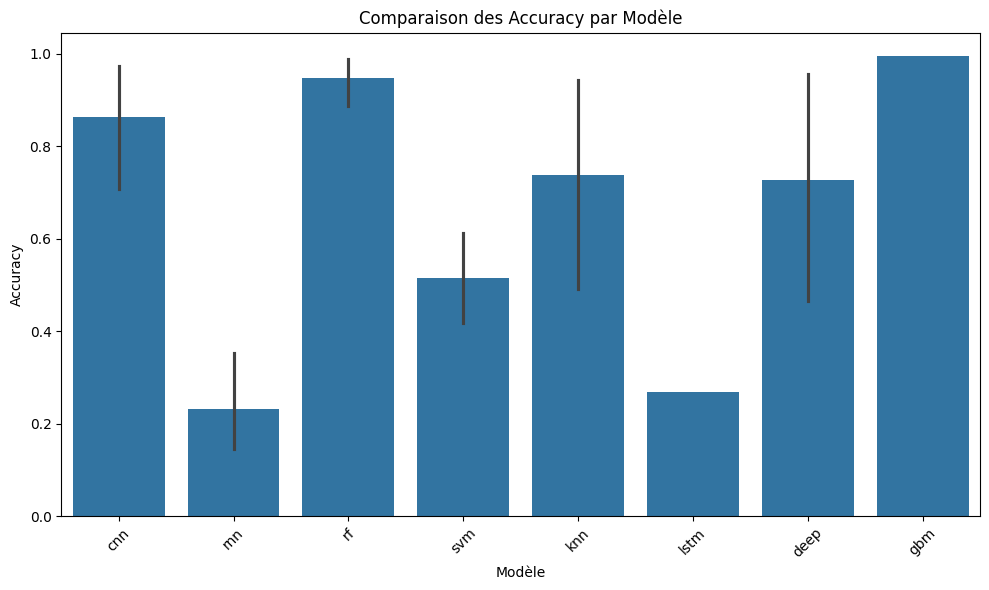

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes pertinentes
metrics_columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
df_metrics = df[metrics_columns]

# Créer un graphique pour comparer les Accuracy par modèle
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_metrics)
plt.title('Comparaison des Accuracy par Modèle')
plt.xlabel('Modèle')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


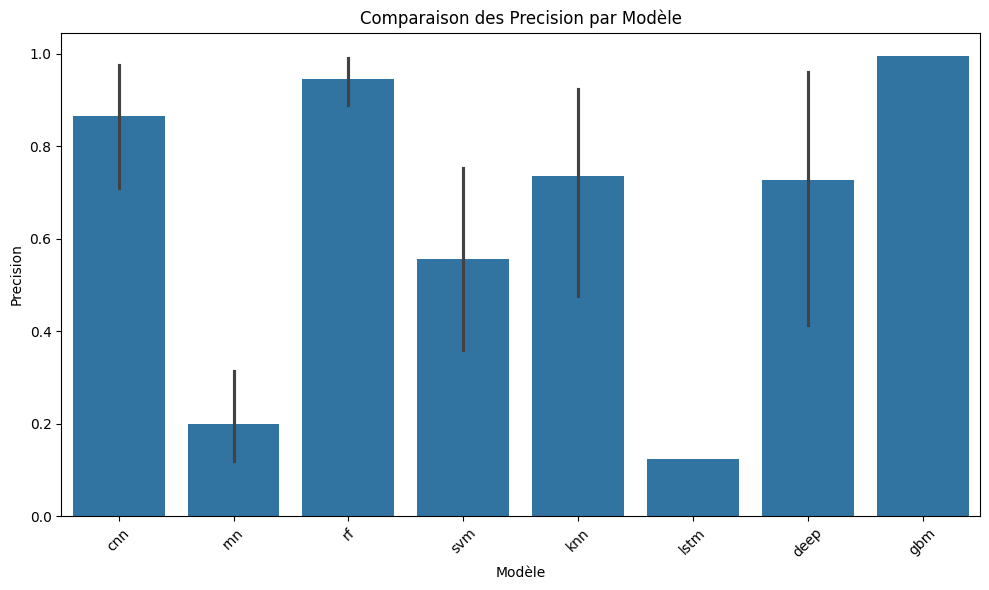

In [10]:
# Créer un graphique pour comparer les Precision par modèle
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=df_metrics)
plt.title('Comparaison des Precision par Modèle')
plt.xlabel('Modèle')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse et Prédiction Automatique des ECG
Dans cette partie du projet, l'objectif principal est d'automatiser l'analyse des électrocardiogrammes (ECG) à l'aide de différents modèles d'apprentissage automatique. Le système repose sur des modèles pré-entraînés, une gestion flexible des données et une API capable de recevoir des signaux ECG et de retourner une analyse détaillée, incluant les classes les plus probables et une estimation du niveau de dangerosité des battements cardiaques.

### Choix des Modèles et Préparation des Données
L'un des premiers aspects critiques de cette solution est la flexibilité offerte par le choix des modèles d'apprentissage automatique. Plusieurs architectures sont disponibles, telles que les réseaux récurrents (RNN), les réseaux convolutifs (CNN), ainsi que des méthodes plus classiques comme SVM ou Random Forest. Cette diversité permet d'adapter l'analyse en fonction du type de données ou des besoins spécifiques. Le système est conçu de manière à ce que l'utilisateur puisse facilement choisir le modèle souhaité pour effectuer l'analyse.

Les données ECG, souvent capturées sous différents formats et à différentes fréquences, nécessitent une normalisation et une mise à l’échelle avant l'analyse. Les échantillons sont ajustés pour correspondre à des longueurs prédéfinies selon le type de fichier (par exemple, "frag", "full"). Cette étape est essentielle pour garantir que les données soient conformes aux exigences d'entrée des modèles utilisés. Ce processus inclut également l'application d'outils de prétraitement comme le StandardScaler pour normaliser les données si nécessaire.

### Chargement des Modèles Pré-entraînés
Les modèles d'apprentissage automatique utilisés dans cette application sont pré-entraînés sur des ensembles de données ECG annotés. En fonction du modèle sélectionné, le système charge automatiquement les fichiers appropriés. Par exemple, les modèles basés sur des réseaux de neurones (LSTM, CNN, RNN) sont chargés à partir de fichiers au format Keras (.h5), tandis que les modèles classiques comme SVM ou Random Forest sont chargés à l’aide de joblib sous forme de fichiers .pkl. Cette approche garantit une réutilisation efficace des modèles, évitant de réentraîner le modèle à chaque analyse.

### Prédiction et Estimation du Danger
Une fois le modèle chargé, les données ECG normalisées sont passées à travers le modèle pour obtenir une prédiction. Pour les réseaux de neurones, les données sont redimensionnées pour correspondre au format attendu par les modèles et prédictions. Le résultat de cette prédiction est un ensemble de probabilités associées à chaque classe de battement cardiaque, parmi un ensemble de classes prédéfinies.

Parmi les classes prédites, le système sélectionne les trois classes les plus probables. Cela permet non seulement de voir la classe principale, mais aussi d'avoir une vue plus large sur les alternatives possibles en cas d'incertitude. L'une des fonctionnalités importantes de cette solution est l'évaluation du niveau de dangerosité. Chaque classe de battement cardiaque est associée à un niveau de danger allant de 1 (normal) à 6 (très dangereux). Cette évaluation aide les utilisateurs à comprendre la gravité potentielle de la situation et à prendre les mesures appropriées.

### Sélection des Données ECG Basée sur la Couleur
Le système intègre également une fonctionnalité de sélection aléatoire des fichiers ECG basée sur un code couleur, où chaque couleur représente un niveau de danger différent. Par exemple, une sélection verte indique des situations non critiques, tandis qu'une sélection rouge correspond à des cas où des arythmies graves sont présentes. Cette approche de sélection basée sur le risque permet d'effectuer des tests plus ciblés sur des types de données spécifiques.

### Affichage des Résultats et Analyse via API
Après l'analyse, l'utilisateur peut visualiser les probabilités associées à chaque classe de battement cardiaque. Les résultats incluent également les trois prédictions principales, présentées avec leurs pourcentages de probabilité respectifs. Ce retour visuel est essentiel pour comprendre la répartition des classes et le niveau de confiance du modèle.

En outre, cette solution est intégrée à une API REST qui permet à d'autres systèmes ou utilisateurs d'envoyer des données ECG et de recevoir en retour une analyse complète. L'API renvoie les résultats sous forme de JSON, incluant la classe prédite, les probabilités associées à chaque classe et le niveau de dangerosité. Ce type d’architecture permet une automatisation de l’analyse des ECG à grande échelle et facilite l'intégration avec d'autres services médicaux ou d'alerte.